In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm

In [71]:
df=pd.read_csv("Downloads/housing.csv")

In [72]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.05, verbose = 1)

Epoch 1/10
11/11 [==============================] - 2s 26ms/step - loss: 582.8798 - mae: 22.2950 - val_loss: 598.3284 - val_mae: 22.5184
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 538.2740 - mae: 21.2424 - val_loss: 542.9300 - val_mae: 21.2116
Epoch 3/10
11/11 [==============================] - 0s 6ms/step - loss: 468.4674 - mae: 19.4694 - val_loss: 451.5313 - val_mae: 18.8391
Epoch 4/10
11/11 [==============================] - 0s 9ms/step - loss: 362.7217 - mae: 16.3985 - val_loss: 323.5153 - val_mae: 14.8625
Epoch 5/10
11/11 [==============================] - 0s 8ms/step - loss: 236.7706 - mae: 12.3223 - val_loss: 196.4391 - val_mae: 10.2570
Epoch 6/10
11/11 [==============================] - 0s 6ms/step - loss: 148.3938 - mae: 9.4489 - val_loss: 134.1655 - val_mae: 8.4389
Epoch 7/10
11/11 [==============================] - 0s 10ms/step - loss: 124.9629 - mae: 8.7278 - val_loss: 120.4402 - val_mae: 8.0507
Epoch 8/10
11/11 [==============================] 

In [74]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 5ms/step - loss: 65.7670 - mae: 6.0594
Mean squared error on test data:  65.76703643798828
Mean absolute error on test data:  6.059396266937256


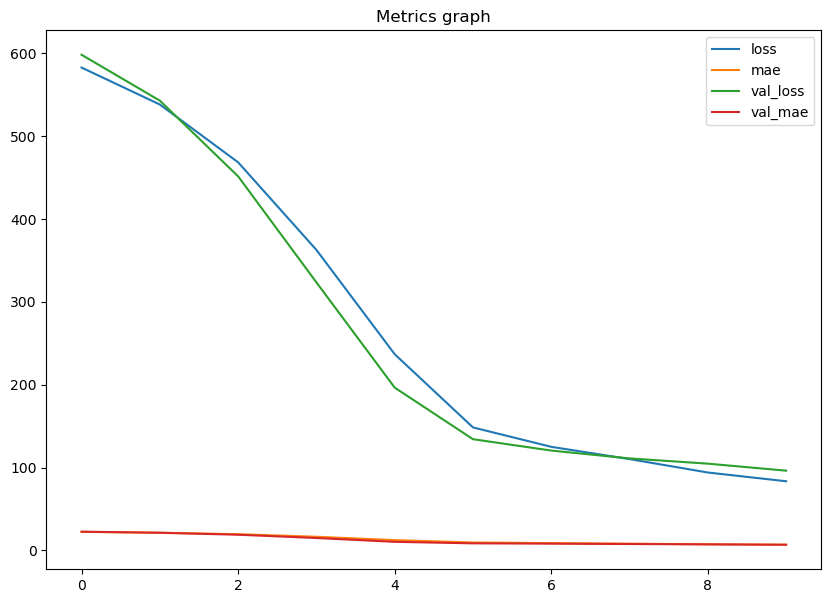

In [75]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [77]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


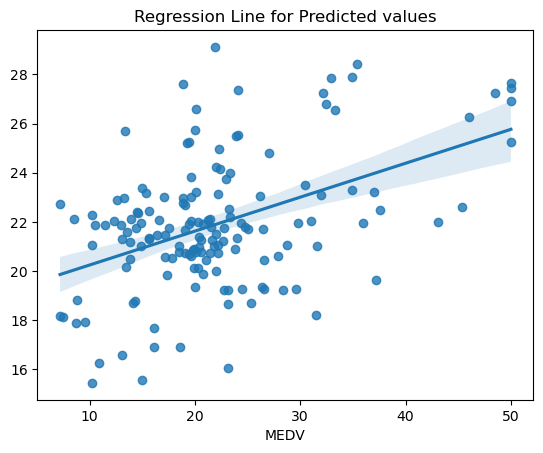

In [78]:
sns.regplot(x=y_test, y=y_pred)
plt.title("Regression Line for Predicted values")
plt.show()

In [80]:
def regression_metrics_display(y_test, y_pred):
    print(f"MAE is {metrics.mean_absolute_error(y_test, y_pred)}")
    print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
    print(f"R2 score is {metrics.r2_score(y_test, y_pred)}")

In [81]:
regression_metrics_display(y_test, y_pred)

MAE is 6.05939554917185
MSE is 65.76703292508728
R2 score is 0.18633445916781677
